In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


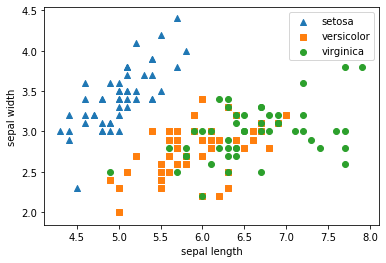

In [4]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분 2개 추출하는 객체 생성

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled) # fitting해서 모델 생성
iris_pca = pca.transform(iris_scaled) # 변환
print(iris_pca.shape) # 변환한 것 shape을 찍어봄

(150, 2)


In [8]:
iris_pca # transform하면 ndarray가 나옴

array([[-2.57612023,  0.47449927],
       [-2.41532249, -0.67809197],
       [-2.65933256, -0.34828193],
       [-2.60199054, -0.60330594],
       [-2.68374418,  0.6402204 ],
       [-2.41219305,  1.48486231],
       [-2.72650791,  0.04037433],
       [-2.54754039,  0.21784304],
       [-2.63111739, -1.12151504],
       [-2.50568834, -0.47375311],
       [-2.49309024,  1.03899203],
       [-2.62658449,  0.12690795],
       [-2.53463285, -0.73367377],
       [-2.89043509, -0.96998871],
       [-2.52492662,  1.85524436],
       [-2.57661201,  2.68047277],
       [-2.52724177,  1.47833344],
       [-2.51071301,  0.48379741],
       [-2.26217005,  1.40241037],
       [-2.64311325,  1.12144398],
       [-2.27440347,  0.40624212],
       [-2.52398522,  0.91873733],
       [-3.01440545,  0.44855689],
       [-2.18617043,  0.08328077],
       [-2.54029796,  0.1318046 ],
       [-2.30389499, -0.62854387],
       [-2.38796377,  0.23807154],
       [-2.49345491,  0.52241515],
       [-2.46849629,

In [9]:
# ndarray를 데이터 프레임으로 변환
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


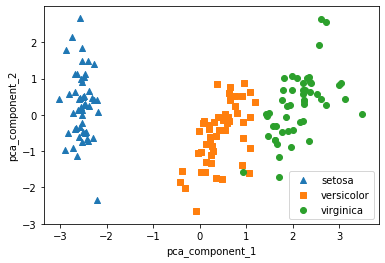

In [10]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA 변환된 데이터 세트가 원본보다 더 명확하게 분리되어 있음
- pca_component_1이 우너본 데이터의 변동성을 매우 잘 반영
- explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트 별로 차지하는 변동성 비율 제공

In [11]:
# PCA를 적용하지 않고 모델을 만들겠다.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(
      rcf
    , iris.data # iris 데이터를 사용 => PCA를 하지 않은 데이터를 사용
    , iris.target,scoring='accuracy'
    ,cv=3
)
print(scores)

[0.98 0.94 0.96]


In [12]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(
      rcf
    , pca_X # PCA를 적용한 데이터 
    , iris.target
    , scoring='accuracy'
    , cv=3 
)
print(scores_pca)

[0.98 0.98 1.  ]


- PCA가 더 좋은 결과가 나왔음 => 그러나 원래는 많은 차이가 나지 않을 뿐 PCA를 적용하면 성능이 떨어진다. 

### Credit card 데이터 세트 PCA 변환

In [16]:
import pandas as pd

df = pd.read_excel('../data/credit_card.xls'
                   , sheet_name='Data'
                   , header=1
                  )
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- default payment next month 가 label이 된다.

In [17]:
del df['ID'] # id를 지움
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [18]:
# default payment next month 이름이 너무 길어서 줄임
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [19]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

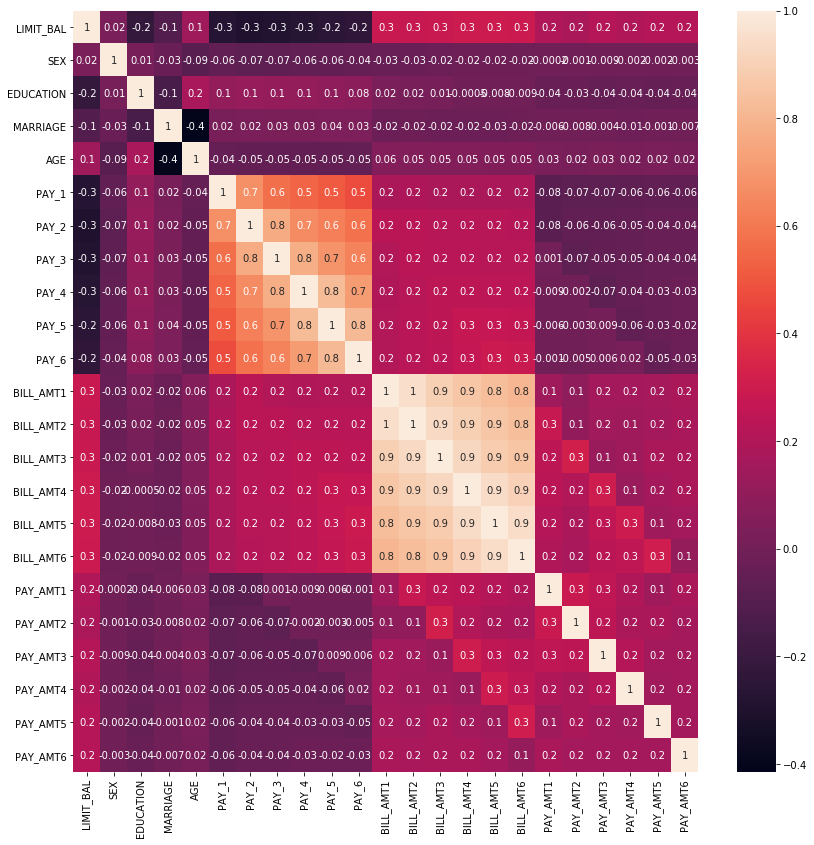

In [22]:
# 컬럼들의 상관관계를 출력 (히트맵으로)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr() # corr : 상관관계를 구하는 함수
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g') # annotation 표시, 상관관계 표시

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9이상으로 매우 높음을 알 수 있음
- 높은 상관도를 가진 속성들은 소수의 PCA 만으로도 자연스럽게 이 속성들의 변동성 수용가능

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있음

In [24]:
# 원데이터(주성분 추출X)로 모델 생성, 성능평가
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7909 0.7967 0.8019]
PCA 변환 데이터 셋 평균 정확도:0.7965


**PCA를 적용하면 정확도가 하락한다**